In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.random.seed(42)
p = 0.8
a = ["Circle", "Square"]

size = 100
data = np.random.choice(a=a, size=size, p=[p, 1-p])

In [3]:
df = pd.DataFrame(data=data, columns=['X'])

In [4]:
df.describe()

,X
count,100
unique,2
top,Circle
freq,82


In [5]:
df.replace({'Circle': 0, 'Square': 1}, inplace=True)

In [6]:
df['y'] = df.apply(lambda row: int(row["X"] == 0), axis=1)

df

,X,y
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
95,0,1
96,0,1
97,0,1
98,0,1


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df['X'], df['y'], test_size=0.2)

In [9]:
p_random = X_test.value_counts() / len(X_test)
p_random

0    0.85
1    0.15
Name: X, dtype: float64

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

In [11]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

In [12]:
for train_index, test_index in split.split(df, df['X']):
    strat_train = df.loc[train_index]
    strat_test = df.loc[test_index]

In [13]:
p_strat = strat_test['X'].value_counts() / len(strat_test)
p_strat 

0    0.8
1    0.2
Name: X, dtype: float64

In [14]:
p_overall = pd.Series(data=[p, 1-p], name='Overall')
p_overall

0    0.8
1    0.2
Name: Overall, dtype: float64

In [15]:
p_strat.rename("Strata", inplace=True)
p_random.rename("Random", inplace=True)

0    0.85
1    0.15
Name: Random, dtype: float64

In [16]:
dfsumm = pd.concat([p_overall, p_strat, p_random], axis=1)
dfsumm


,Overall,Stratified,Random
0,0.8,0.8,0.85
1,0.2,0.2,0.15


In [17]:
from sklearn.metrics import mean_absolute_error

In [18]:
np.round(mean_absolute_error(p_overall, p_random) * 100)

5.0

In [19]:
np.round(mean_absolute_error(p_overall, p_strat) * 100)

0.0

In [20]:
dfsumm

,Overall,Stratified,Random
0,0.8,0.8,0.85
1,0.2,0.2,0.15


[Text(0, 0, 'Circle'), Text(1, 0, 'Square')]

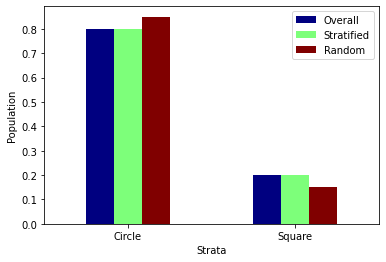

In [21]:
ax = dfsumm.plot(kind="bar", cmap=plt.get_cmap("jet"))
ax.set_ylabel("Population")
ax.set_xlabel("Strata")
ax.set_xticklabels(["Circle", "Square"], rotation=0)
